In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

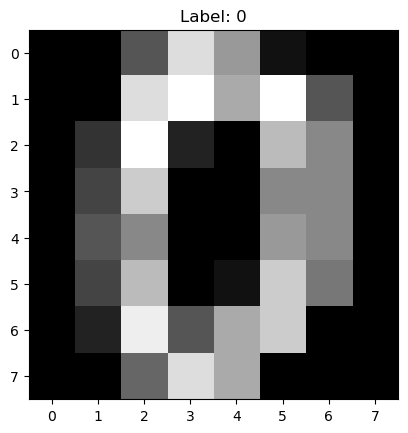

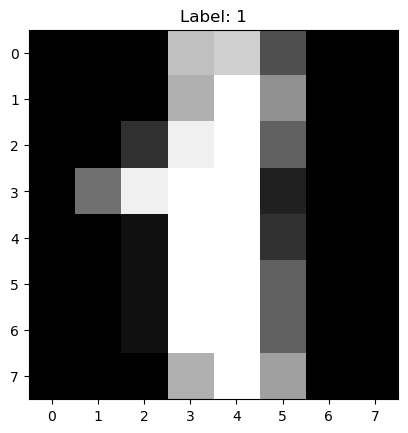

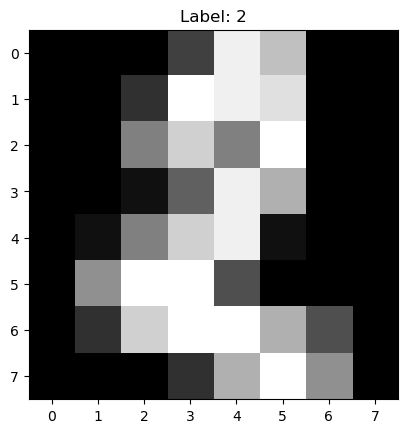

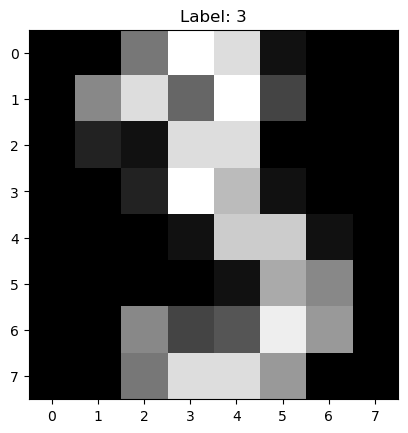

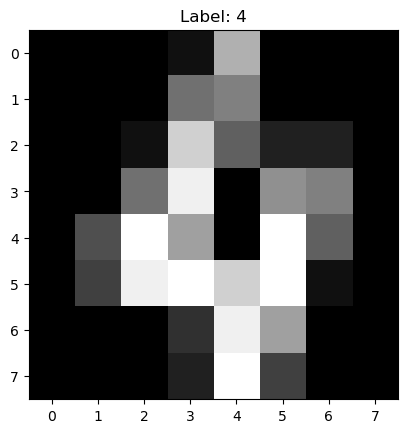

In [3]:
for i in range(5):
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.show()

In [4]:
X = digits.images.reshape(-1, 64)
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [5]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(64, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1) # log(exp(x)/∑(exp(x)))=x−log(∑(exp(x)))
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [6]:
model = MLP()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [7]:
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"[{epoch + 1}] Loss: {running_loss / (i + 1)}")


[1] Loss: 1.7174029856920243
[2] Loss: 0.6271264657378197
[3] Loss: 0.3976278305053711
[4] Loss: 0.3133347347378731
[5] Loss: 0.2579754523932934
[6] Loss: 0.22700241655111314
[7] Loss: 0.20933105275034905
[8] Loss: 0.18293543197214604
[9] Loss: 0.16680507510900497
[10] Loss: 0.1611913785338402
[11] Loss: 0.1441629219800234
[12] Loss: 0.13641099371016024
[13] Loss: 0.1294503416866064
[14] Loss: 0.12224527187645436
[15] Loss: 0.11590509992092848
[16] Loss: 0.1092193029820919
[17] Loss: 0.10510677378624678
[18] Loss: 0.10104485545307398
[19] Loss: 0.09574101194739341
[20] Loss: 0.09117840211838484
[21] Loss: 0.08546331040561199
[22] Loss: 0.0841016786172986
[23] Loss: 0.0793988948687911
[24] Loss: 0.07882484560832381
[25] Loss: 0.07449640557169915
[26] Loss: 0.07492002574726939
[27] Loss: 0.06939009400084614
[28] Loss: 0.06701442329213023
[29] Loss: 0.06447147503495217
[30] Loss: 0.06434433646500111
[31] Loss: 0.06259111259132624
[32] Loss: 0.06021622084081173
[33] Loss: 0.058625392615795

In [8]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model